# Image processing

- Images are stored in images folder to be used by this project.
- We will do some image processing like blurring, denoise or flip them to understand the basic operations on any image.

## View

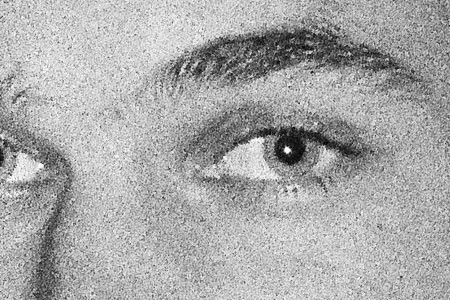

In [4]:
from PIL import Image     # import this package

img = Image.open('images/eye.png')
img = img.convert("L") # grayscale
img   # same
#img.show()    # pop up the image instead of showing it in line in the notebook.

## Flip horizontally

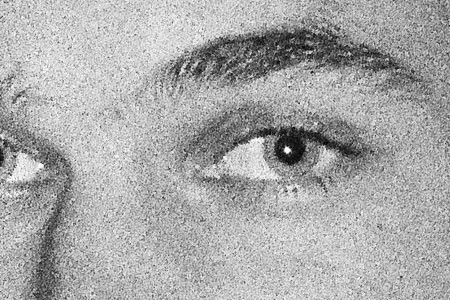

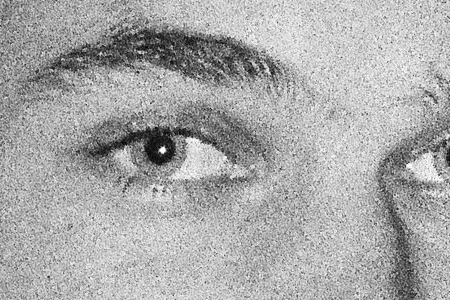

In [5]:
def flip(img):
    image = Image.open(img)
    image = image.convert("L")
    
    width, height = image.size   # returns tuple containing the width and height of image
    
    # Duplicate image for storing flipped image 
    image_dup = image.copy()  
    
    # Storing pixels to iterate over
    mat_d = image_dup.load()   # load() returns the matrix containing pixel values for the image
    mat = image.load()
    
    # Logic : swap horizonatl values
    for x in range(width):
        for y in range(height):
            mat_d[x,y] = mat[width-x-1,y]    # this line does the main part of flipping; it sets x=width-x-1
             
    return display(image,image_dup)


flip('images/eye.png')

## Blur
- We will do this by creating a new image whose pixels are the average of the surrounding pixels of region 3x3.
- pixel[x,y] is the sum of pixel[x,y] and all surrounding pixels divided by 9, the total number of pixels.

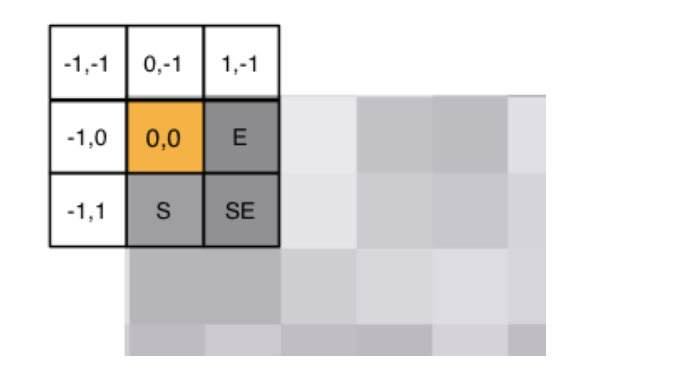

In [9]:
display(Image.open('images/pixels.png'))

- As we can see some of the pixels in our 3x3 region will be outside of the image as we shift the region around. 
- One such example is, for pixel at x=0, y=0, 5 of the pixels will be out of range, as shown in the above figure and we need to define a function getpixel() to handle such cases.
    - If the x value is less than 0, set it to 0.
    - If the x value is greater than or equal to the width, set it to the width minus 1 (the last valid pixel on the far right).
    - If the y value is less than 0, set it to 0.
    - If the y value is greater than or equal to the height, set it to the height minus 1 (the last felt pixel on the bottom).
    - Return the pixel at x, y. 

In [10]:
def avg(data):                            # gets the average of all 9 pixels
    return int(sum(data)/len(data))
  
def region3x3(pic,a,b):                   # gets 9X9 pixel size and returns a list of 9 pixels
    
    # assumes order : current pixel(o), N, NE, E, SE, S, SW, W, NW.
    # you can try other sequence as well that would work too!
    o  = getpixel(pic,a,b)
    n  = getpixel(pic,a,b-1)
    ne = getpixel(pic,a+1,b-1)
    e  = getpixel(pic,a+1,b)
    se = getpixel(pic,a+1,b+1)
    s  = getpixel(pic,a,b+1)
    sw = getpixel(pic,a-1,b+1)
    w  = getpixel(pic,a-1,b)
    nw = getpixel(pic,a-1,b-1)
    
    data = [o,n,ne,e,se,s,sw,w,nw]
    
    return data

def getpixel(pic,x,y):                    # gets co-ordinate of a point(x,y)
    width, height = pic.size
    
    # x and y must be between 0-(width-1) and 0-(height-1) resp.; handling these two scenarios here
    if x<0:   
        x=0
    if x>=width:
        x=width-1
    if y<0:
        y=0
    if y>=height:
        y=height-1
    
    # using load return the pixels for each combination of x and y.
    m = pic.load()
    return m[x,y]

def blur(image):
    width, height = img.size
    
    img_dup = img.copy()
    
    pixels = img_dup.load()
    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)       # get the 9 surrounding pixels
            pixels[x,y] = avg(r)         # calculate the avg of 9 pixels
            
    return img_dup

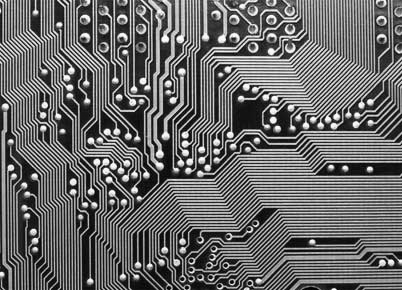

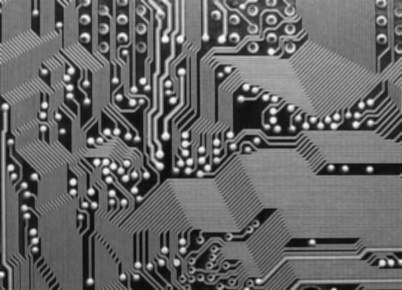

In [11]:
img = Image.open('images/pcb.png')
img = img.convert("L")
display(img)
image = blur(img)
display(image)

## Denoise
- To denoise, we will use the median, which is just the middle value in a list of ordered numbers (or average of two middle if there are an even number of values).

In [16]:
def median(d):
    data = sorted(d)
    l = len(data)
    if l%2==0:    # if list is even, find avergae of two medians
        return (data[(l//2)]+data[(l//2)+1])/2
    else:         # if list is odd, find the center point
        return data[l//2]   # '//' Floor division - gives whole number adjusted to the left in the number line. 


def denoise(img):
    
    width, height = img.size
    img_dup = img.copy()
    pixels = img_dup.load()
    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)
            pixels[x,y] = median(r)    # instead of avg use median for denoise.
            
    return img_dup

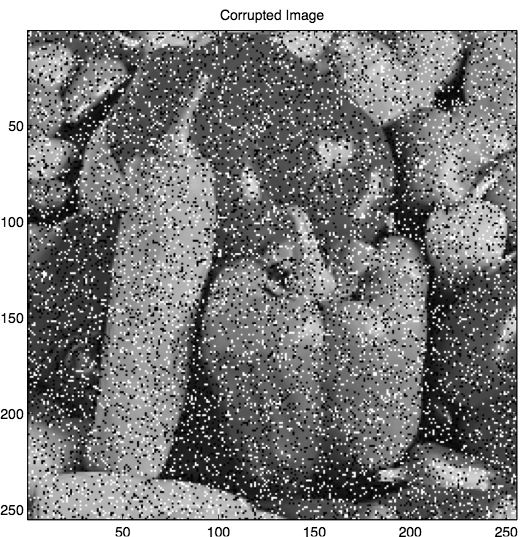

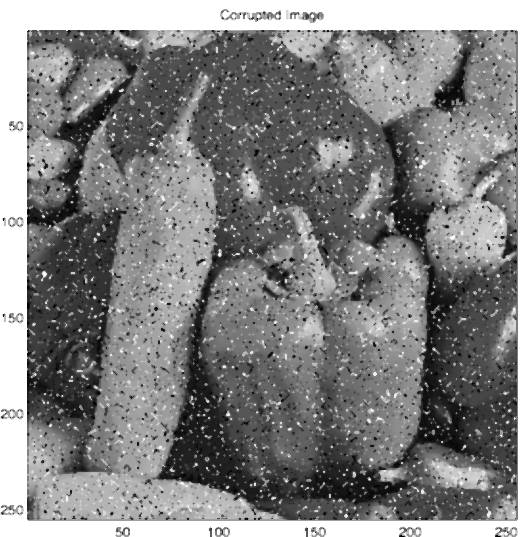

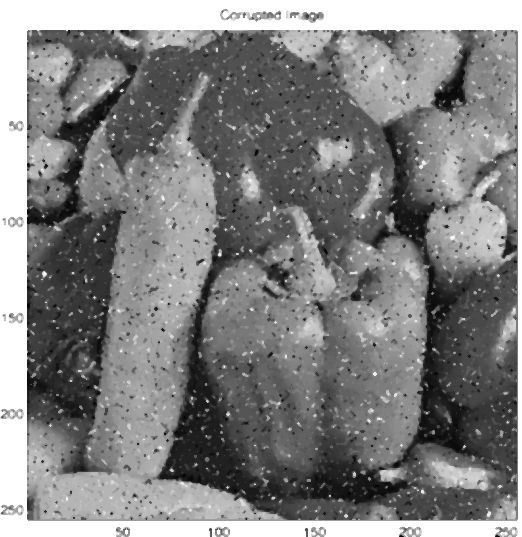

In [17]:
# denoise the image 3 times to check how clear it becomes with every iteration
img = Image.open('images/Veggies_noise.jpg')
img = img.convert("L")
display(img)
image_2 = denoise(img)
display(image_2)
image_3 = denoise(image_2)
display(image_3)


In [18]:
img = Image.open('images/guesswho.png')
img = img.convert("L")

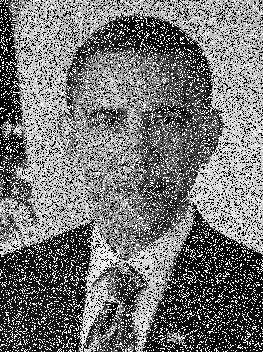

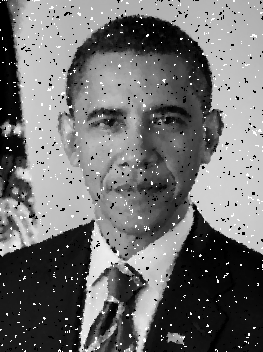

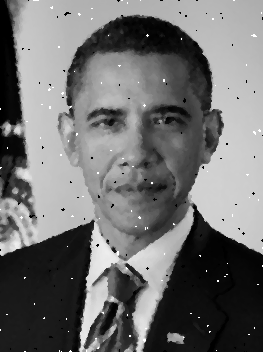

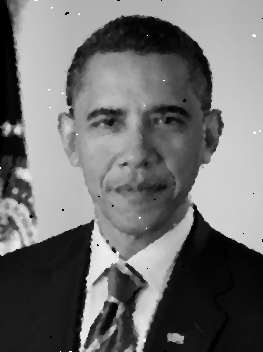

In [19]:
display(img)
img_2 = denoise(img)
display(img_2)
img_3 = denoise(img_2)
display(img_3)
img_4 = denoise(img_3)
display(img_4)


## Generic filter
- Create a generic function which does both denoise and blur depending on the function used - median or avg.
- This increases readability and reuse of code.

In [20]:
# opens the image 
def open(fname):
    img = Image.open(fname)
    img = img.convert("L")
    return img

# generic function which takes f as argument which can be an avg() or median()
def filter(img,f):
    width, height = img.size
    
    img_dup = img.copy()
    
    pixels = img_dup.load()
    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)
            pixels[x,y] = f(r)            # f can be used for any function passed as parameter
    return img_dup

### Blur refactored

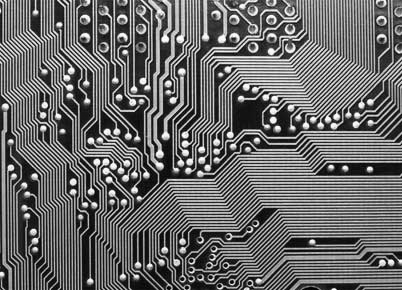

In [21]:
img = open('images/pcb.png')
display(img)

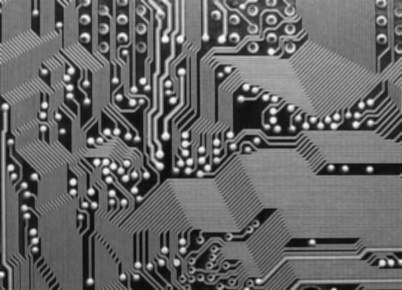

In [22]:
blurred  = filter(img, avg)   # passing avg: blurring the image
display(blurred)

### Denoise refactored

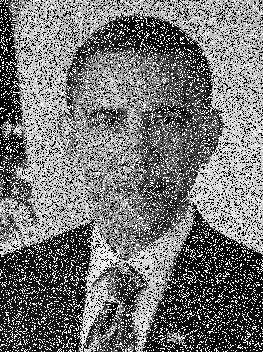

In [23]:
img = open('images/guesswho.png')
display(img)

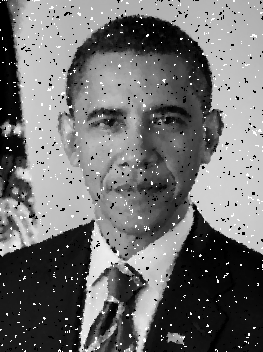

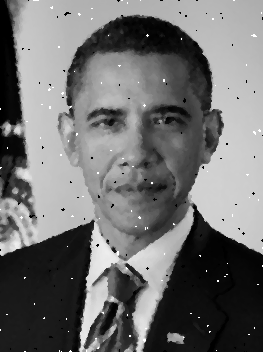

In [24]:
denoised = filter(img, median)  # passing median: denoise the image
display(denoised)
denoised_again = filter(denoised,median) # denoised twice
display(denoised_again)

## Edges
- We want to highlight edges found within an image.
- Create afunction laplace : return the sum of the North, South, East, and West pixels minus 4 times the middle pixel from our usual region.

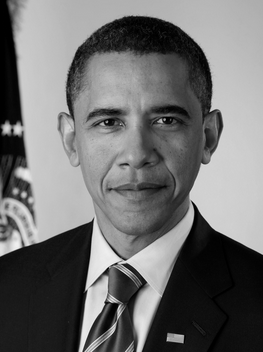

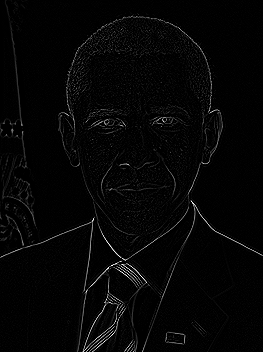

In [25]:
def laplace(data):
    lap_value = data[1]+data[3]+data[5]+data[7]-4*data[0]
    return lap_value
    
img = open('images/obama.png')
display(img)
edges = filter(img, laplace)
display(edges)

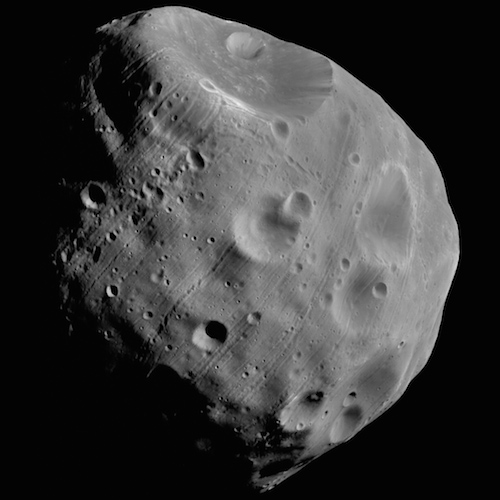

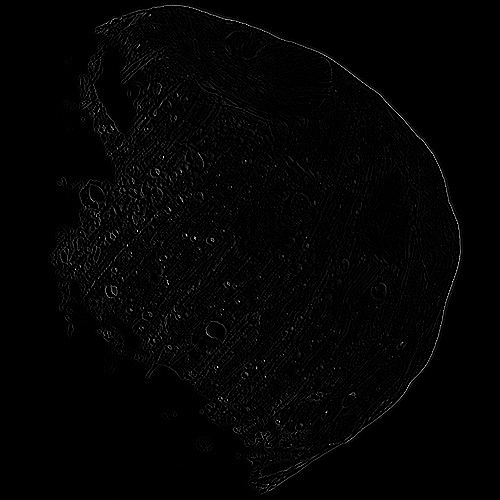

In [26]:
img = open('images/phobos2.jpg')
display(img)
edges = filter(img, laplace)
display(edges)

## Sharpen
- Highlight the edges by subtracting that white-on-black edges image (we get from laplace) from the original.

In [27]:
def minus(image1,image2):
    width,height = image1.size
    pixel1 = image1.load()
    pixel2 = image2.load()
    
    img = image1.copy()
    pixel = img.load()
    
    for x in range(width):
        for y in range(height):
            pixel[x,y] = pixel1[x,y]-pixel2[x,y]    # subtracting edges from the original image sharpens it.
    
    return img

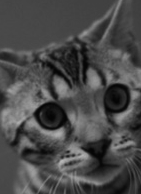

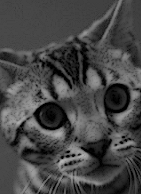

In [28]:
img = open('images/bonkers.png')
display(img)
edges = filter(img, laplace)
sharp = minus(img,edges)
display(sharp)

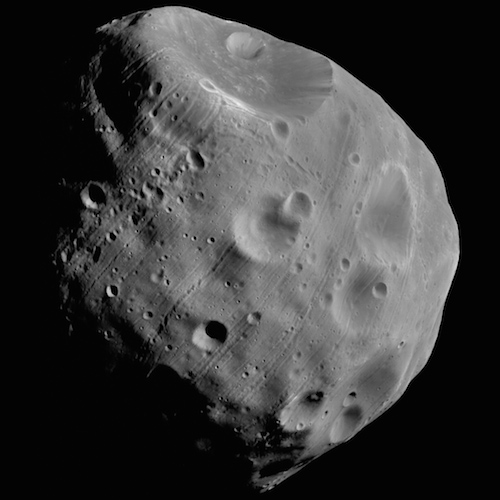

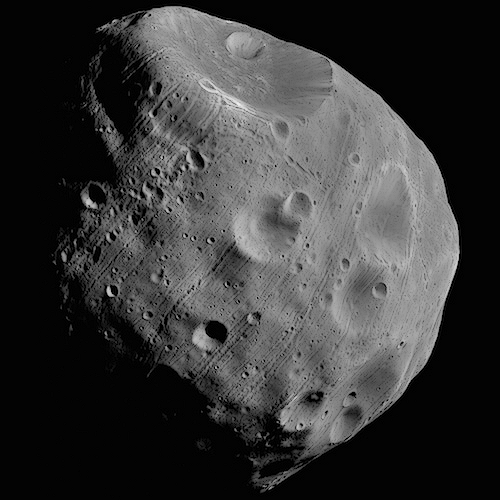

In [29]:
img = open('images/phobos2.jpg')
display(img)
edges = filter(img, laplace)
sharp = minus(img,edges)
display(sharp)